In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
print("sklearn version: ", sklearn.__version__)
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
print("TF version: ", tf.__version__)
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# GPU test
print("GPU installed: ",tf.test.is_built_with_gpu_support())

# To prevent "CUDNN_STATUS_ALLOC_FAILED" error with GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
    
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")   

sklearn version:  0.24.2
TF version:  2.6.2
No GPU was detected. CNNs can be very slow without a GPU.
GPU installed:  True


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
os.getcwd()

'C:\\ANN2022\\project'

In [4]:
# file이 있는 path로 이동
os.chdir("./emnist")
# os.chdir('/content/drive/MyDrive/ANN/') 

In [5]:
# 현재 작업 경로 확인
path = os.getcwd()
print(path)

C:\ANN2022\project\emnist


In [6]:
# Load EMNIST dataset
import pandas as pd
# import gzip

byclass_train = pd.read_csv("./emnist-byclass-train.csv")
byclass_test = pd.read_csv("./emnist-byclass-test.csv")
mapp = pd.read_csv("./emnist-byclass-mapping.txt", 
                   delimiter = ' ', index_col=0, header=None, squeeze=True)

In [7]:
# DataFrame
byclass_train.shape

(697931, 785)

In [8]:
byclass_train.head()

,35,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.466,0.467,0.468,0.469,0.470,0.471,0.472,0.473,0.474,0.475
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
byclass_test.shape

(116322, 785)

In [10]:
byclass_test.head()

,18,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
classes = len(byclass_train['35'].value_counts())
print('number of classes: ', classes)

number of classes:  62


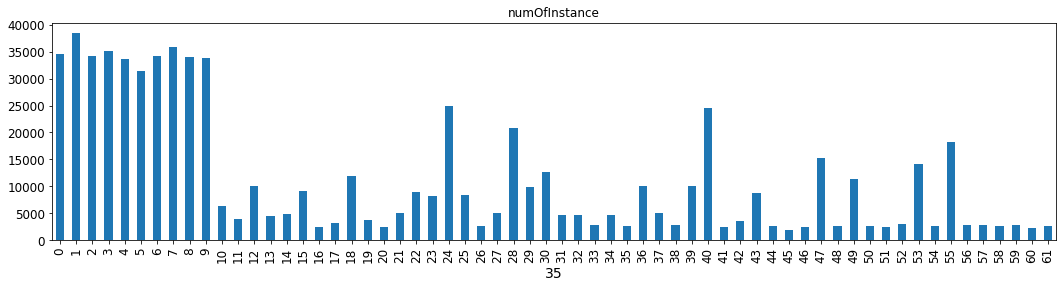

In [12]:
(byclass_train.groupby(['35']).size()).plot(kind='bar', figsize=(18, 4))
plt.title('numOfInstance')
plt.show()

In [13]:
"""# 30분 이상 소요..

from sklearn.manifold import TSNE

image_tsne = TSNE(n_components=2).fit_transform(balanced_train)"""

'# 30분 이상 소요..\n\nfrom sklearn.manifold import TSNE\n\nimage_tsne = TSNE(n_components=2).fit_transform(balanced_train)'

In [14]:
"""# seaborn lib 설치 필요

import seaborn as sns

plt.figure(figsize=(16,10))
plt.title("Digits T-SNE visualization", fontsize=25)
sns.scatterplot(
    x=image_tsne[:,0], y=image_tsne[:,1],
    hue=byclass_train["35"],
    palette=sns.color_palette("hls", 62),
    legend="full"
)
plt.show()"""

'# seaborn lib 설치 필요\n\nimport seaborn as sns\n\nplt.figure(figsize=(16,10))\nplt.title("Digits T-SNE visualization", fontsize=25)\nsns.scatterplot(\n    x=image_tsne[:,0], y=image_tsne[:,1],\n    hue=byclass_train["35"],\n    palette=sns.color_palette("hls", 62),\n    legend="full"\n)\nplt.show()'

In [15]:
# label만 뽑아내기
y_train_full = byclass_train[['35']]

# data만 뽑아내기
X_train_full = byclass_train.drop(['35'], axis=1)

In [16]:
# test에 대해서 반복
y_test = byclass_test[['18']]
X_test = byclass_test.drop(['18'], axis=1)

In [17]:
# pandas DF를 numpy로 바꿔주기
X_train_full, y_train_full = X_train_full.to_numpy(), y_train_full.to_numpy()
X_test, y_test = X_test.to_numpy(), y_test.to_numpy()

In [18]:
# Normalise data
X_train_full = X_train_full/255.
X_test = X_test/255.

In [19]:
X_train_full.astype('float32')
X_test.astype('float32')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
# Reshape image for CNN
X_train_full = X_train_full.reshape(-1, 28, 28, 1)

X_test = X_test.reshape(-1, 28, 28, 1)

print("X_train.shape:", X_train_full.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (697931, 28, 28, 1)
X_test.shape: (116322, 28, 28, 1)


In [21]:
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical

print('number of classes: ', classes)

# One hot encoding
y_train_full = to_categorical(y_train_full, classes)
y_test = to_categorical(y_test, classes)
print("y_train: ", y_train_full.shape)
print("y_test: ", y_test.shape)

number of classes:  62
y_train:  (697931, 62)
y_test:  (116322, 62)


In [22]:
# generate train and valid dataset
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=321)

In [23]:
# Print shape and datatype of X_rain_full

print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)

(558344, 28, 28, 1) float64
(558344, 62) float32


# Modeling

## LeNet-5

In [36]:
from functools import partial
from keras import Model
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten,Activation, Dropout

# LeNet-5
tf.random.set_seed(42)
np.random.seed(42)

input_img = Input(shape=(28, 28, 1))

x = Conv2D(6, (5, 5), padding='same', activation='relu')(input_img)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(16, (5, 5), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(120, (5, 5), padding='same', activation='relu')(x)

x = Flatten()(x)
x = Dense(units=84, activation='relu')(x)
output = Dense(units=62, activation='softmax')(x)

lenet5_Model = Model(inputs=input_img, outputs=output)

In [37]:
lenet5_Model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten_11 (Flatten)         (None, 5880)              0   

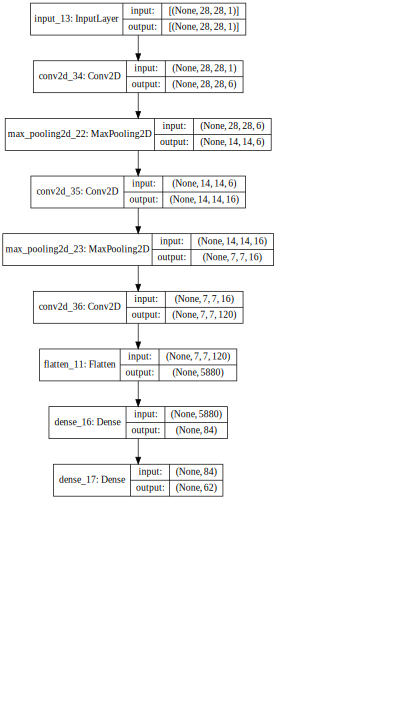

In [38]:
# pydot lib 설치 필요
import pydotplus as pydot
from tensorflow.keras.utils import plot_model

plot_model(lenet5_Model, to_file='lenet5_Model.png')

# visualize our model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(lenet5_Model, show_shapes=True, dpi=50).create(prog='dot', format='svg'))
# SVG(model_to_dot(inception_Model, dpi=50).create(prog='dot', format='svg'))

In [40]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

# checkpoint
filepath="model_val_loss.best.hdf5"
checkpoint_acc = ModelCheckpoint(filepath, monitor='val_accuary', verbose=1, save_best_only=True, mode='auto')
# Early Stopping
earlyStopping_acc = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1, mode='auto', baseline=None, restore_best_weights=True)

callbacks_list = [checkpoint_acc, earlyStopping_acc]

# optimizer SGD 사용함
optimizer_SGD = keras.optimizers.SGD(momentum=0.9)

lenet5_Model.compile(loss='categorical_crossentropy',optimizer=optimizer_SGD, metrics=['accuracy'])
lenet_history = lenet5_Model.fit(X_train, y_train,
                                        batch_size=64,
                                        epochs=10,
                                        validation_data=(X_valid, y_valid),
                                        callbacks=callbacks_list)

Epoch 1/10
8725/8725 [==============================] - 172s 20ms/step - loss: 0.4449 - accuracy: 0.8412 - val_loss: 0.4001 - val_accuracy: 0.8564
Epoch 2/10
8725/8725 [==============================] - 169s 19ms/step - loss: 0.3819 - accuracy: 0.8589 - val_loss: 0.3854 - val_accuracy: 0.8602
Epoch 3/10
8725/8725 [==============================] - 175s 20ms/step - loss: 0.3598 - accuracy: 0.8653 - val_loss: 0.3798 - val_accuracy: 0.8606
Epoch 4/10
8725/8725 [==============================] - 168s 19ms/step - loss: 0.3455 - accuracy: 0.8694 - val_loss: 0.3710 - val_accuracy: 0.8622
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping


In [41]:
score = lenet5_Model.evaluate(X_test, y_test)
print('\nTest acc: ', score)

3636/3636 [==============================] - 14s 4ms/step - loss: 0.3985 - accuracy: 0.8554

Test acc:  [0.39854997396469116, 0.8553841710090637]


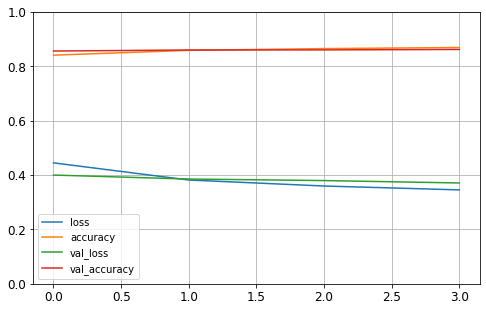

In [42]:
pd.DataFrame(lenet_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## MobileV2

In [47]:
from tensorflow.keras.applications import MobileNet
from keras.models import Sequential,Model 
from keras.layers import Dense,Dropout,Activation,Flatten,GlobalAveragePooling2D
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [51]:
# 32*32 이상이어야 해서 불러오는건 포기
# img_rows,img_cols = 224, 224
# MobileNet = MobileNet(weights=None,include_top=False,input_shape=(img_rows,img_cols,1))